In [9]:
import os
from importlib import reload

import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from skimage import io, transform

from models import NeuralNetwork
from utils import ProteinAtlasTrainDataset, ProteinAtlasTestDataset


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

PATH = 'models/protein_net.pth'

train_dir = 'data/train/'
train_csv_file = os.path.join(train_dir, 'train.csv')

test_dir = 'data/test/'
test_csv_file = os.path.join(test_dir, 'sample_submission.csv')

In [2]:
reload(ProteinAtlasTrainDataset)

trainset = ProteinAtlasTrainDataset.ProteinAtlasTrainDataset(csv_file=train_csv_file, root_dir=train_dir, image_mean=13.42)

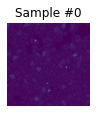

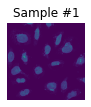

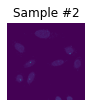

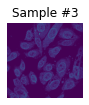

In [3]:
fig = plt.figure()

for i in range(len(trainset)):
    sample = trainset[i]

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(sample['image'])
    plt.pause(0.001)

    if i == 3:
        plt.show()
        break

In [4]:
train_loader = DataLoader(
    trainset,
    batch_size=64,
    num_workers=0,
    shuffle=True
)

In [5]:
# mean_image = torch.zeros(512, 512)
# nb_elements = 0

# for data in loader:
#     data = data['image']
#     nb_elements += data.shape[0]
#     mean_image += data.sum(0)
    
# mean_image /= nb_elements
# mean_image.mean()

In [7]:
reload(ProteinAtlasTestDataset)

testset = ProteinAtlasTestDataset.ProteinAtlasTestDataset(test_csv_file, test_dir, image_mean=13.42)

test_loader = DataLoader(
    testset,
    batch_size=64,
    num_workers=0,
    shuffle=False
)

In [10]:
net = NeuralNetwork.NeuralNetwork()

net.load_state_dict(torch.load(PATH))
net.eval()

NeuralNetwork(
  (conv1): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=250000, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=28, bias=True)
)

In [22]:
prediction_id = []
prediction_label = []

for i, data in enumerate(test_loader, 0):
    # get the inputs; data is a list of [inputs, labels]
    image, image_id = data['image'].unsqueeze(1), data['id']

    # forward + backward + optimize
    outputs = net(image)

    array = outputs.detach().numpy()
    array = np.around(array).astype(int)

    for i in range(array.shape[0]):
        labels = np.argwhere(array[i])
        if not len(labels):
            labels = str(np.argmax(array[i]))
        else:
            labels = reversed([str(item) for sublist in labels for item in sublist])
            labels = ' '.join(labels)
        prediction_id.append(image_id[i])
        prediction_label.append(labels)

In [23]:
prediction_id

['00008af0-bad0-11e8-b2b8-ac1f6b6435d0',
 '0000a892-bacf-11e8-b2b8-ac1f6b6435d0',
 '0006faa6-bac7-11e8-b2b7-ac1f6b6435d0',
 '0008baca-bad7-11e8-b2b9-ac1f6b6435d0',
 '000cce7e-bad4-11e8-b2b8-ac1f6b6435d0',
 '00109f6a-bac8-11e8-b2b7-ac1f6b6435d0',
 '001765de-bacd-11e8-b2b8-ac1f6b6435d0',
 '0018641a-bac9-11e8-b2b8-ac1f6b6435d0',
 '00200f22-bad7-11e8-b2b9-ac1f6b6435d0',
 '0026f154-bac6-11e8-b2b7-ac1f6b6435d0',
 '002729d2-bace-11e8-b2b8-ac1f6b6435d0',
 '002c1a7c-bad4-11e8-b2b8-ac1f6b6435d0',
 '003170fa-bacd-11e8-b2b8-ac1f6b6435d0',
 '0031820a-baca-11e8-b2b8-ac1f6b6435d0',
 '00407c16-bad3-11e8-b2b8-ac1f6b6435d0',
 '005ce2ea-bacc-11e8-b2b8-ac1f6b6435d0',
 '00631ec8-bad9-11e8-b2b9-ac1f6b6435d0',
 '00673f64-bad2-11e8-b2b8-ac1f6b6435d0',
 '0070171c-bad0-11e8-b2b8-ac1f6b6435d0',
 '007290b6-bad8-11e8-b2b9-ac1f6b6435d0',
 '0075ee26-bacb-11e8-b2b8-ac1f6b6435d0',
 '00763d66-bacd-11e8-b2b8-ac1f6b6435d0',
 '007eca68-bac7-11e8-b2b7-ac1f6b6435d0',
 '008ab0b8-bad5-11e8-b2b8-ac1f6b6435d0',
 '008e8c3e-bad4-

In [24]:
prediction_label

['0',
 '0',
 '25',
 '0',
 '0',
 '0',
 '25',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '25 0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0']

In [26]:
submission = pd.DataFrame({'Id' : prediction_id, 'Target' : prediction_label})
submission.to_csv("submission.csv")

,Id,Target
0,00008af0-bad0-11e8-b2b8-ac1f6b6435d0,0
1,0000a892-bacf-11e8-b2b8-ac1f6b6435d0,0
2,0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,25
3,0008baca-bad7-11e8-b2b9-ac1f6b6435d0,0
4,000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,0
...,...,...
59,014c1cac-bacc-11e8-b2b8-ac1f6b6435d0,0
60,014db382-bacc-11e8-b2b8-ac1f6b6435d0,0
61,014f8b62-bacc-11e8-b2b8-ac1f6b6435d0,0
62,015083f4-bad7-11e8-b2b9-ac1f6b6435d0,0


In [27]:
criterion = nn.BCELoss()

In [28]:
criterion(torch.Tensor(np.array([1,0,0])), torch.Tensor(np.array([0,1,0])))

tensor(66.6667)